## Choosing a dataset

I've chosen to work with an official US Government database, this being the customer complaints received in the country related to financial products. This has given me space to reflect about how this data is used and could be used in the future.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import squarify as sq
import seaborn as sns


df = pd.read_csv("complaints.csv")
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,06/09/25,"Money transfer, virtual currency, or money ser...",International money transfer,Other transaction problem,NaN,My PayPal account was permanently limited with...,NaN,"Paypal Holdings, Inc",FL,33020,NaN,Consent provided,Web,06/09/25,Closed with explanation,Yes,NaN,13969405.0
1,06/15/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,Personal Statement Personal Statement Personal...,NaN,"EQUIFAX, INC.",GA,30101,Servicemember,Consent provided,Web,06/15/25,Closed with non-monetary relief,Yes,NaN,14088539.0
2,01/24/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,11413,NaN,Consent not provided,Web,01/24/25,Closed with explanation,Yes,NaN,11765241.0
3,12/04/24,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",TN,37013,NaN,Consent not provided,Web,12/04/24,Closed with non-monetary relief,Yes,NaN,11024413.0
4,04/08/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TN,37406,NaN,Consent not provided,Web,04/08/25,Closed with explanation,Yes,NaN,12873721.0


Initial exploration.

In [2]:
df.shape

(3489365, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489365 entries, 0 to 3489364
Data columns (total 18 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Date received                 object 
 1   Product                       object 
 2   Sub-product                   object 
 3   Issue                         object 
 4   Sub-issue                     object 
 5   Consumer complaint narrative  object 
 6   Company public response       object 
 7   Company                       object 
 8   State                         object 
 9   ZIP code                      object 
 10  Tags                          object 
 11  Consumer consent provided?    object 
 12  Submitted via                 object 
 13  Date sent to company          object 
 14  Company response to consumer  object 
 15  Timely response?              object 
 16  Consumer disputed?            float64
 17  Complaint ID                  float64
dtypes: float64(2), object(

In [4]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                           0
Issue                                 0
Sub-issue                         80225
Consumer complaint narrative    2706508
Company public response         1818971
Company                               1
State                              6435
ZIP code                              4
Tags                            3384085
Consumer consent provided?       791730
Submitted via                         1
Date sent to company                  1
Company response to consumer          1
Timely response?                      1
Consumer disputed?              3489365
Complaint ID                          1
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.nunique()


Date received                       366
Product                              11
Sub-product                          55
Issue                                89
Sub-issue                           209
Consumer complaint narrative     424682
Company public response              10
Company                            3480
State                                60
ZIP code                          21304
Tags                                  3
Consumer consent provided?            4
Submitted via                         4
Date sent to company                366
Company response to consumer          5
Timely response?                      2
Consumer disputed?                    0
Complaint ID                    3489364
dtype: int64

In [7]:
df.describe(include="all")

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,3489365,3489365,3489365,3489365,3409140,782857,1670394,3489364,3482930,3489361,105280,2697635,3489364,3489364,3489364,3489364,0.0,3.489364e+06
unique,366,11,55,89,209,424682,10,3480,60,21304,3,4,4,366,5,2,NaN,NaN
top,01/17/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,My credit reports are inaccurate. These inaccu...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,02/25/25,Closed with explanation,Yes,NaN,NaN
freq,27203,3070814,3057891,1728502,1105853,10849,1632979,1028943,514308,41966,78383,1871160,3461502,25658,1510097,3476554,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.234671e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.537999e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.696345e+06
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.102366e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.229107e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.370086e+07


In [8]:
print(df.columns.tolist())


['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


In [1]:
df.to_csv('complaintscopy.csv')

NameError: name 'df' is not defined

## To-be-answered questions - Open ended EDA questions

### Main question #1
What are the trends or patterns that can be found in consumer complaint volumes, issues and in the response behaviour across different financial products and throughout different companies?

### Main question #2
Which demographic or geographic factors influence complaint volumes the most, and are there regional differences in the types of financial products or issues reported?

### Main question #3
Do certain companies have consistently higher complaint rates or patterns of unresolved issues, and how does this correlate with their response strategies (e.g. timely response, dispute handling, closed with explanation)?

### Some other questions to address

- Which products receive the most consumer complaints?

- What are the most common issues reported by consumers?

- How are complaints distributed over time?

- How are complaints submitted?

- Which product-issue combinations are most frequent?

- Which states receive the most complaints?

- Which companies receive the most complaints per product?

- Do consumers tend to dispute complaints more with certain companies?

- Are certain submission channels more likely to lead to disputes?

- How does the number of complaints vary by state and product?

## Data Cleaning

In [9]:

columns_to_keep = [
    "Date received",
    "Product",
    "Issue",
    "Company",
    "State",
    "Submitted via",
    "Company response to consumer",
    "Timely response?",
    "Consumer disputed?",
    "Complaint ID"
]
df = df[columns_to_keep]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489365 entries, 0 to 3489364
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Date received                 object 
 1   Product                       object 
 2   Issue                         object 
 3   Company                       object 
 4   State                         object 
 5   Submitted via                 object 
 6   Company response to consumer  object 
 7   Timely response?              object 
 8   Consumer disputed?            float64
 9   Complaint ID                  float64
dtypes: float64(2), object(8)
memory usage: 266.2+ MB


In [11]:
# Double checking if we have null values:
df.isnull().sum()

Date received                         0
Product                               0
Issue                                 0
Company                               1
State                              6435
Submitted via                         1
Company response to consumer          1
Timely response?                      1
Consumer disputed?              3489365
Complaint ID                          1
dtype: int64

In [12]:
#Now, I'll set the empty 'Consumer disputed?' values with 'No response'
df['Consumer disputed?'] = df['Consumer disputed?'].fillna('No response')

# Fill missing submission method with 'Unknown'
df['Submitted via'] = df['Submitted via'].fillna('Unknown')

# Drop rows where company response is missing (only a few)
df = df.dropna(subset=['Company response to consumer'])

In [13]:
# Checking if there are any duplicates
df.duplicated().sum()

np.int64(0)

In [14]:
df = df[columns_to_keep].copy()

In [15]:
df['Date received'].head()

0    04/10/25
1    07/08/25
2    09/10/24
3    06/24/25
4    06/05/25
Name: Date received, dtype: object

In [16]:
# Converting columns:
df['Date received'] = pd.to_datetime(df['Date received'], format='%m/%d/%y')
df['State'] = df['State'].astype('category')
df['Product'] = df['Product'].astype('category')


In [17]:
df['Date received'].head()

0   2025-04-10
1   2025-07-08
2   2024-09-10
3   2025-06-24
4   2025-06-05
Name: Date received, dtype: datetime64[ns]

In [18]:
# Grouping similar products together for better visualization
df['Product grouped'] = df['Product'].replace({
    'Student loan': 'Other loans',
    'Vehicle loan or lease': 'Other loans',
    'Payday loan, title loan, personal loan, or advance loan': 'Other loans',
})


C:\Users\pktto\AppData\Local\Temp\ipykernel_23468\3906887478.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Product grouped'] = df['Product'].replace({


## EDA Questions

#### Main question 1:
##### What are the trends or patterns that can be found in consumer complaint volumes, issues and in the response behaviour across different financial products and throughout different companies?

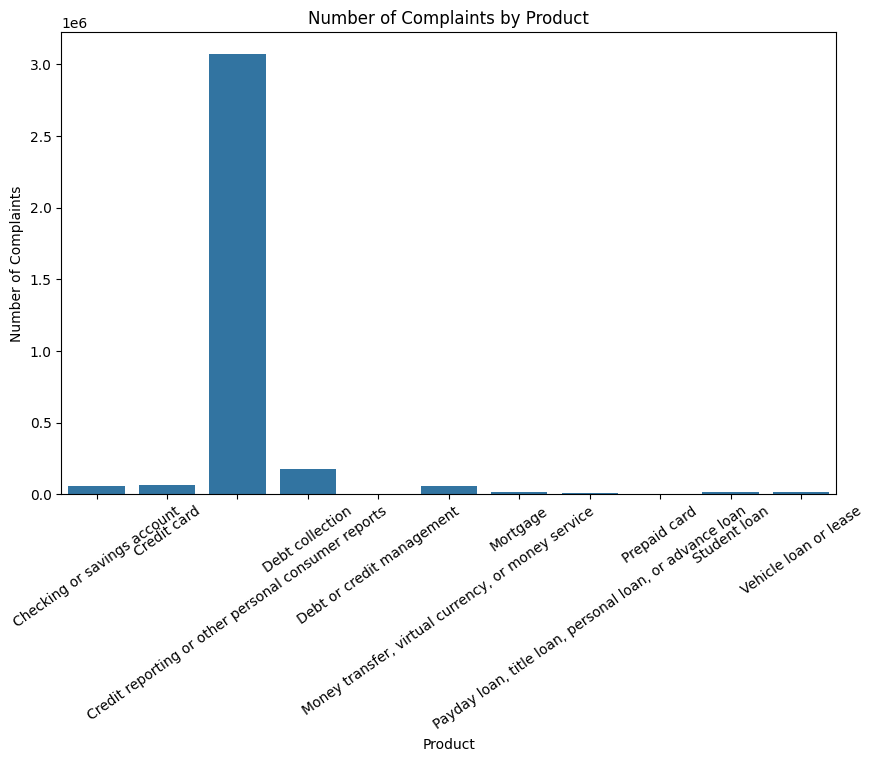

In [22]:
# Count complaints by product
product_complaints = df['Product'].value_counts()
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=product_complaints.index, y=product_complaints.values)
plt.title('Number of Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=35)
plt.show()

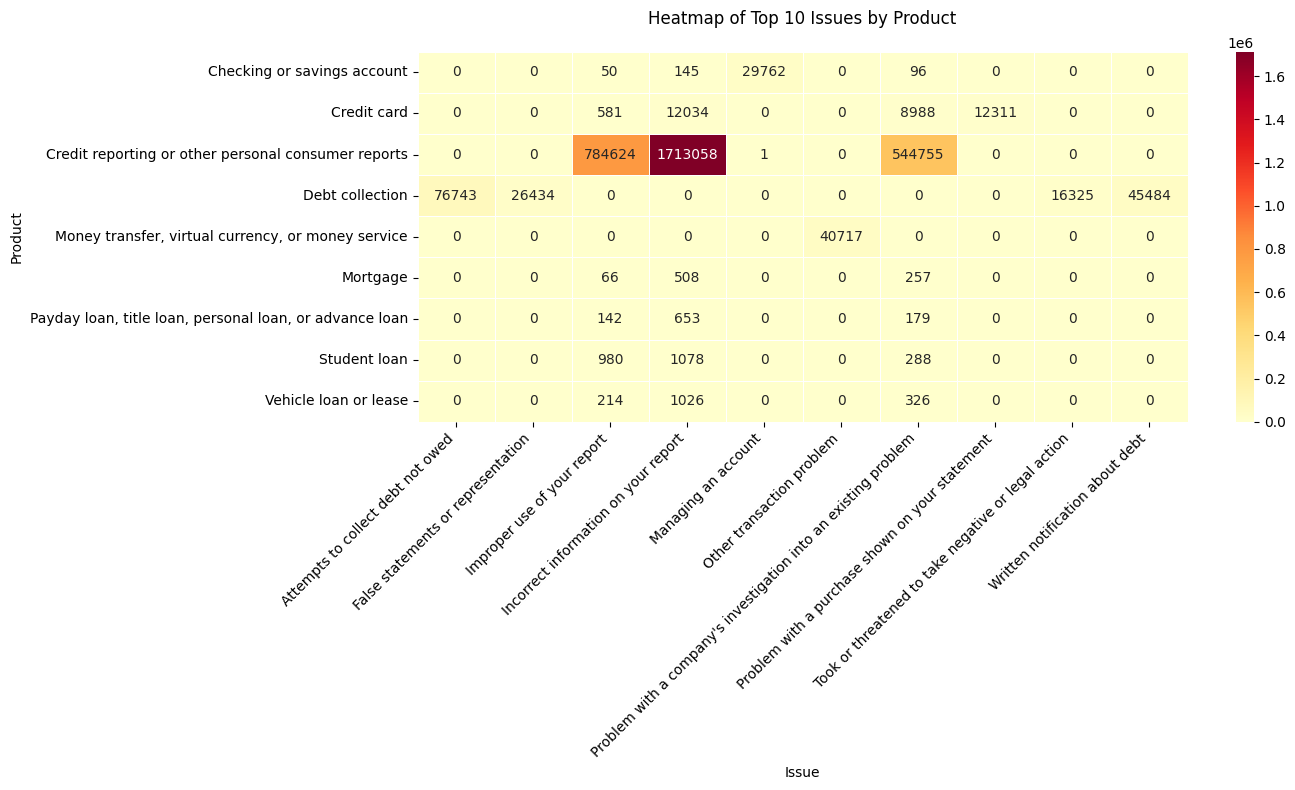

In [ ]:
top_10_issues = df['Issue'].value_counts().head(10).index

df_top_issues = df[df['Issue'].isin(top_10_issues)]


# Product vs. Top Issues
product_issue_ct = pd.crosstab(df_top_issues['Product'], df_top_issues['Issue'])

# Plot
plt.figure(figsize=(14, 8))
ax = sns.heatmap(product_issue_ct, 
                 annot=True, 
                 fmt='d',
                 cmap='YlOrRd',
                 linewidths=.5)
plt.title('Heatmap of Top 10 Issues by Product', pad=20)
plt.xlabel('Issue')
plt.ylabel('Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Main question 2
##### Which demographic or geographic factors influence complaint volumes the most, and are there regional differences in the types of financial products or issues reported?

In [56]:
import plotly.express as px
df_state = df.groupby("State").size().reset_index(name="Count")

df_state["State"] = df_state["State"].str.upper()

fig = px.choropleth(
    df_state,
    locations="State",        
    locationmode="USA-states", 
    color="Count",             
    color_continuous_scale="Reds",  
    scope="usa",               
    title="Number of Complaints by U.S. State"
)

fig.show()


C:\Users\pktto\AppData\Local\Temp\ipykernel_23468\1789955956.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\pktto\AppData\Local\Temp\ipykernel_23468\357915212.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



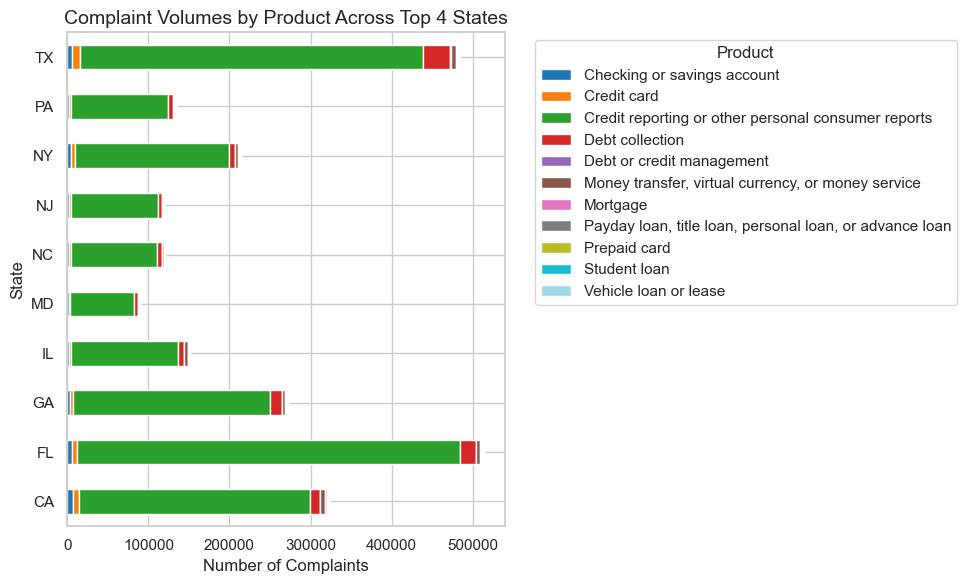

In [55]:
complaints_by_state = (
    df[~df['State'].str.contains('ISLANDS|UNKNOWN', na=False)]  # filter bad labels
    ['State']
    .value_counts()
    .rename_axis('State')
    .reset_index(name='Complaint Count')
)
top_states = complaints_by_state['State'].head(10).tolist()


# Prepare data
complaints_product_state = (
    df[df['State'].isin(top_states)]
    .groupby(['State', 'Product'])
    .size()
    .unstack(fill_value=0)
)


complaints_product_state = complaints_product_state.fillna(0)
complaints_product_state = complaints_product_state[complaints_product_state.sum(axis=1) > 0]



# Plot as horizontal stacked bars
fig, ax = plt.subplots(figsize=(10, 6))
complaints_product_state.plot(
    kind='barh',
    stacked=True,
    colormap='tab20',
    ax=ax
)

ax.set_title('Complaint Volumes by Product Across Top 4 States', fontsize=14)
ax.set_xlabel('Number of Complaints', fontsize=12)
ax.set_ylabel('State', fontsize=12)

ax.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Main question 3
#### Do certain companies have consistently higher complaint rates or patterns of unresolved issues, and how does this correlate with their response strategies (e.g. timely response, dispute handling, closed with explanation)?


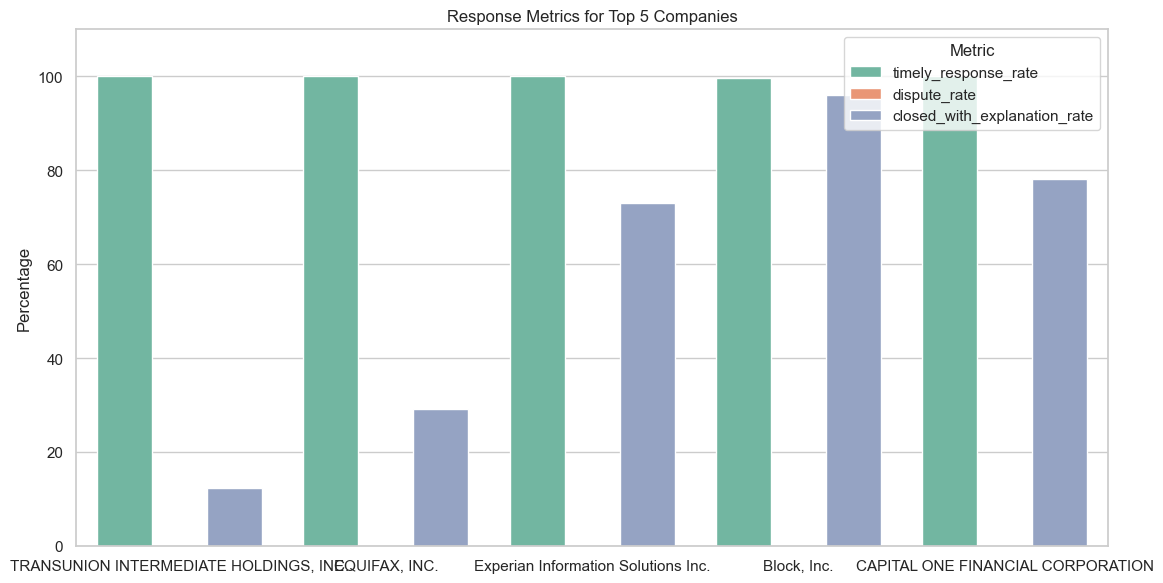

In [29]:
company_stats = df.groupby('Company').agg(
    total_complaints=('Complaint ID', 'count'),
    timely_response_rate=('Timely response?', lambda x: (x == 'Yes').mean() * 100),
    dispute_rate=('Consumer disputed?', lambda x: (x == 'Yes').mean() * 100),
    closed_with_explanation_rate=('Company response to consumer', lambda x: (x == 'Closed with explanation').mean() * 100)
).sort_values(by='total_complaints', ascending=False).head(5)


plot_data = company_stats[['timely_response_rate', 'dispute_rate', 'closed_with_explanation_rate']].reset_index()

plot_data = plot_data.melt(id_vars='Company', var_name='Metric', value_name='Percentage')

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=plot_data,
    x='Company',
    y='Percentage',
    hue='Metric',
    dodge=True,
    palette='Set2'
)

plt.title('Response Metrics for Top 5 Companies')
plt.ylabel('Percentage')
plt.xlabel('')
plt.ylim(0, 110)
plt.xticks(rotation=0)  
plt.legend(title='Metric')
plt.tight_layout()
plt.show()





##### Top 10 complaints' issues (barplot from heatmap)

C:\Users\pktto\AppData\Local\Temp\ipykernel_23468\3490619890.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




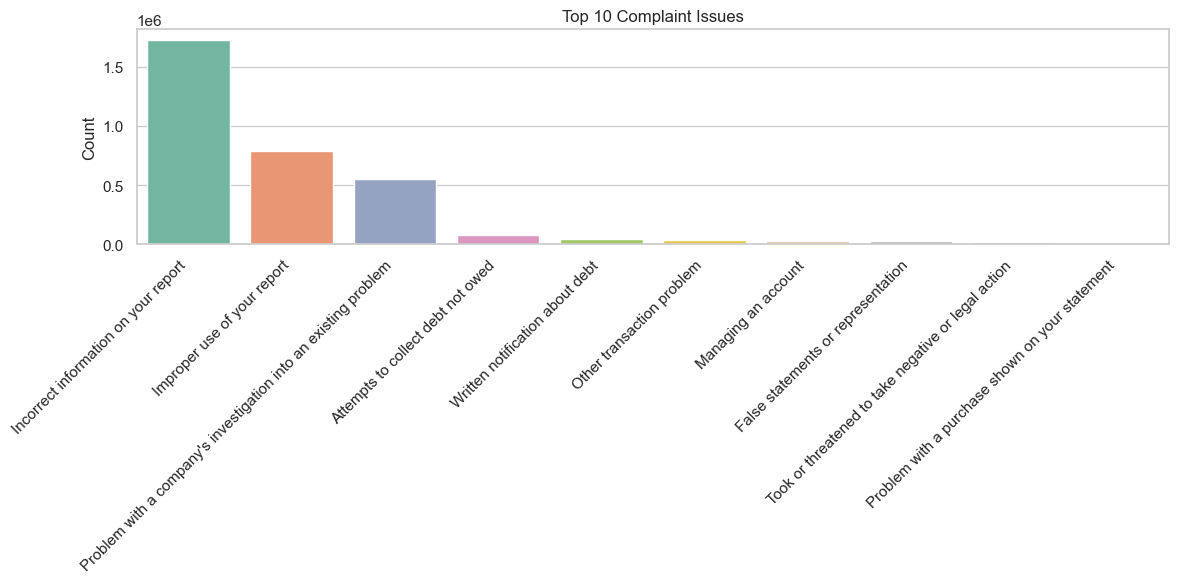

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_issues = df['Issue'].value_counts().head(10).reset_index()
top_10_issues.columns = ['Issue', 'Count']  # rename columns for clarity

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top_10_issues,
    x='Issue',
    y='Count',
    palette='Set2'
)

plt.title('Top 10 Complaint Issues')
plt.ylabel('Count')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')  # rotate labels for readability
plt.tight_layout()
plt.show()


In [63]:
top_10_issues = df['Issue'].value_counts().head(10)
top_10_issues

Issue
Incorrect information on your report                               1728502
Improper use of your report                                         786657
Problem with a company's investigation into an existing problem     554889
Attempts to collect debt not owed                                    76743
Written notification about debt                                      45484
Other transaction problem                                            40717
Managing an account                                                  29763
False statements or representation                                   26434
Took or threatened to take negative or legal action                  16325
Problem with a purchase shown on your statement                      12311
Name: count, dtype: int64

##### - Which products receive the most consumer complaints?

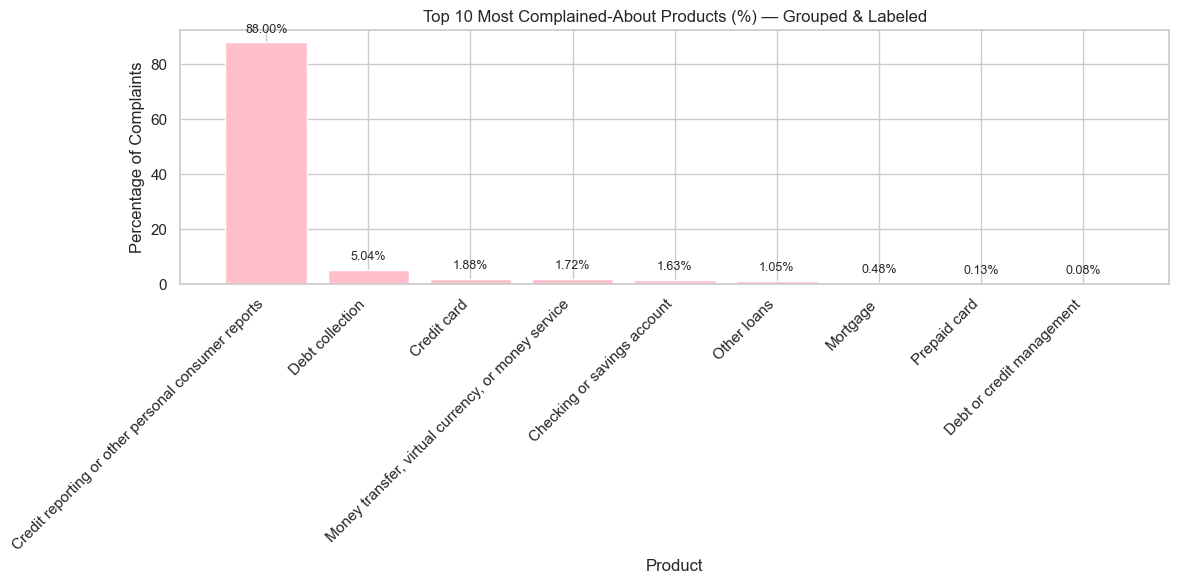

In [33]:

# Recalculate top products with the new grouping
top_products = df['Product grouped'].value_counts(normalize=True) * 100
top_products = top_products.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_products.index, top_products.values, color='pink')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.title('Top 10 Most Complained-About Products (%) — Grouped & Labeled')
plt.xlabel('Product')
plt.ylabel('Percentage of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### - How are complaints distributed over time?
Right after Christmas, the volume of received complaints peaked. Is it because people were too relaxed to complaint during their winter vacation, spending time with family & friends, and were too lazy to do it then, or because most companies stopped their activity during these dates...?

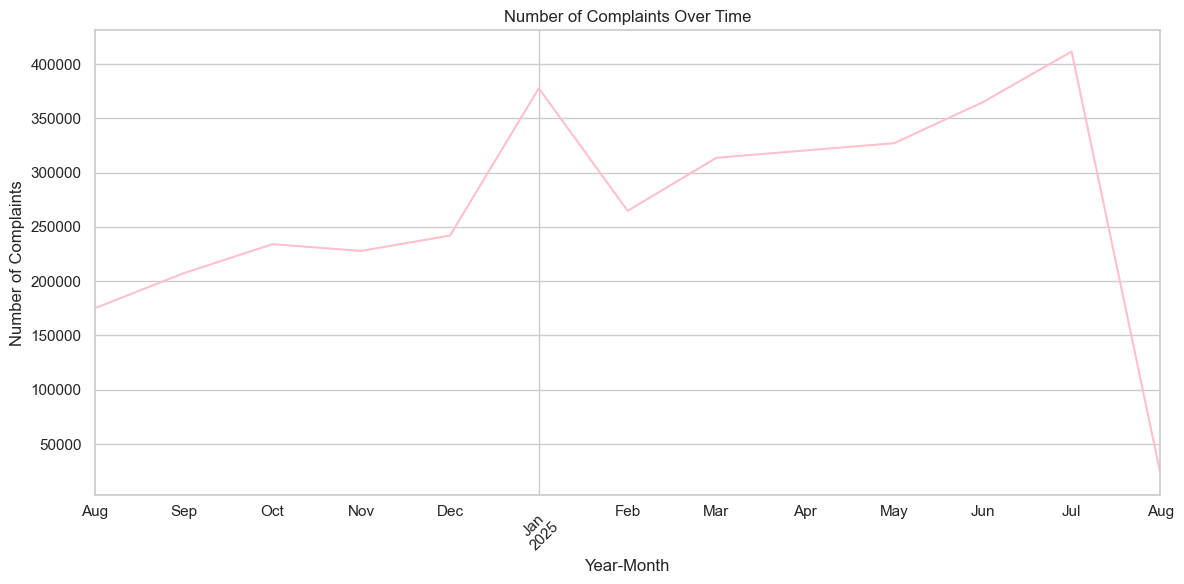

In [36]:
# Create a year-month column
df['YearMonth'] = df['Date received'].dt.to_period('M')

complaints_by_month = df['YearMonth'].value_counts().sort_index()


plt.figure(figsize=(12,6))
complaints_by_month.plot(kind='line', color="pink")
plt.title('Number of Complaints Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### - What are the most common consumer issues?

We can clearly see that the most common complaint was related to the incorrect information on credit reports. This suggests that consumers encounter frequent errors related to their credit scores, which could affect their loan eligibility and/or financial reputation. This could also indicate that the data is experiencing issues when being verified or reported by financial institutions. 

So... How well are companies ensuring data accuracy? Are consumers receiving adequate support? Do they have the adequate tools to dispute these error effectively? 
Given this analysis, these questions raise giving a negative connotation to these entities' reputation.

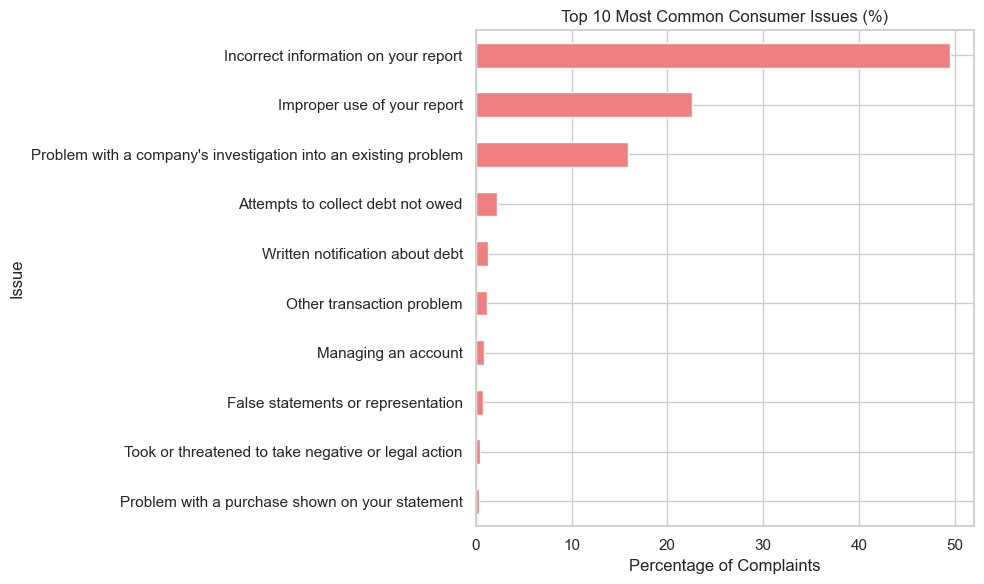

In [39]:
top_issues_pct = df['Issue'].value_counts(normalize=True).head(10) * 100

# Plot
plt.figure(figsize=(10,6))
top_issues_pct.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Top 10 Most Common Consumer Issues (%)')
plt.xlabel('Percentage of Complaints')
plt.ylabel('Issue')
plt.tight_layout()
plt.show()


##### - Which states receive the most complaints?
This study shows that Texas leads regarding the state where the highest number of complaints is received.

In [43]:
import plotly.express as px
df_state = df.groupby("State").size().reset_index(name="Count")

df_state["State"] = df_state["State"].str.upper()

fig = px.choropleth(
    df_state,
    locations="State",        
    locationmode="USA-states", 
    color="Count",             
    color_continuous_scale="Reds",  
    scope="usa",               
    title="Number of Complaints by U.S. State"
)

fig.show()


C:\Users\pktto\AppData\Local\Temp\ipykernel_23468\1789955956.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

